## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import tensorflow as tf

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = tf.keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.1,0.5,0.8,0.95]

### Use nesterov

In [11]:
results = {}
for m in MOMENTUM:
    tf.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(nesterov=True, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentem-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Momentum = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, 

Epoch 48/50
50000/50000 [==============================] - 6s 115us/sample - loss: 1.2165 - acc: 0.5732 - val_loss: 1.3996 - val_acc: 0.5030
Epoch 49/50
50000/50000 [==============================] - 6s 127us/sample - loss: 1.2145 - acc: 0.5728 - val_loss: 1.3920 - val_acc: 0.5091
Epoch 50/50
50000/50000 [==============================] - 6s 120us/sample - loss: 1.2104 - acc: 0.5755 - val_loss: 1.5174 - val_acc: 0.4563
Experiment with Momentum = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3

50000/50000 [==============================] - 6s 124us/sample - loss: 1.0604 - acc: 0.6294 - val_loss: 1.4563 - val_acc: 0.4902
Epoch 49/50
50000/50000 [==============================] - 6s 117us/sample - loss: 1.0445 - acc: 0.6341 - val_loss: 1.4750 - val_acc: 0.4948
Epoch 50/50
50000/50000 [==============================] - 6s 116us/sample - loss: 1.0347 - acc: 0.6391 - val_loss: 1.4291 - val_acc: 0.4965
Experiment with Momentum = 0.800000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)    

50000/50000 [==============================] - 6s 118us/sample - loss: 0.6878 - acc: 0.7568 - val_loss: 1.5991 - val_acc: 0.5139
Epoch 49/50
50000/50000 [==============================] - 6s 111us/sample - loss: 0.6729 - acc: 0.7643 - val_loss: 1.5859 - val_acc: 0.5074
Epoch 50/50
50000/50000 [==============================] - 5s 108us/sample - loss: 0.6605 - acc: 0.7676 - val_loss: 1.5983 - val_acc: 0.5281
Experiment with Momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)    

50000/50000 [==============================] - 6s 116us/sample - loss: 0.3893 - acc: 0.8591 - val_loss: 2.1854 - val_acc: 0.5177
Epoch 49/50
50000/50000 [==============================] - 6s 114us/sample - loss: 0.3712 - acc: 0.8672 - val_loss: 2.1727 - val_acc: 0.5286
Epoch 50/50
50000/50000 [==============================] - 6s 114us/sample - loss: 0.3716 - acc: 0.8663 - val_loss: 2.3151 - val_acc: 0.5125


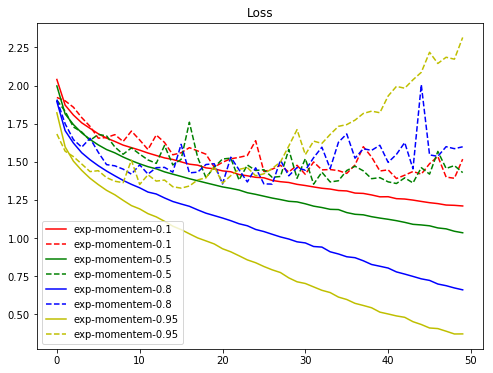

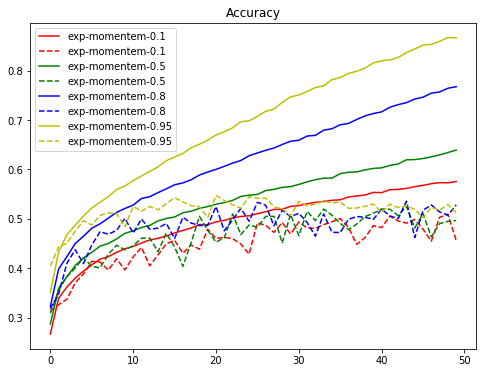

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Without nesterov

In [13]:
results = {}
for m in MOMENTUM:
    tf.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(nesterov=False, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentem-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Epoch 1/50
50000/50000 [==============================] - 5s 92us/sample - loss: 1.9747 - acc: 0.2981 - val_loss: 1.9141 - val_acc: 0.3159
Epoch 2/50
50000/50000 [==============================] - 4s 88us/sample - loss: 1.7956 - acc: 0.3672 - val_loss: 1.8159 - val_acc: 0.3548
Epoch 3/50
50000/50000 [==============================] - 4s 87us/sample - loss: 1.7279 - acc: 0.3906 - val_loss: 1.6907 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 4s 89us/sample - loss: 1.6724 - acc: 0.4091 - val_loss: 1.7114 - val_acc: 0.3952
Epoch 5/50
50000/50000 [==============================] - 5s 91us/sample - loss: 1.6334 - acc: 0.4244 - val_loss: 1.7374 - val_acc: 0.3875
Epoch 6/50
50000/50000 [==============================] - 5s 91us/sample - loss: 1.5991 - acc: 0.4390 - val_loss: 1.6133 - val_acc: 0.4236
Epoch 7/50
50000/50000 [==============================] - 5s 93us/sample - loss: 1.5680 - acc: 0.4449 - val_loss: 1.6605 - val_acc: 0.4078
Epoch 8/50
50000/50000 [===

Epoch 1/50
50000/50000 [==============================] - 5s 98us/sample - loss: 1.9244 - acc: 0.3116 - val_loss: 1.7745 - val_acc: 0.3791
Epoch 2/50
50000/50000 [==============================] - 5s 108us/sample - loss: 1.7209 - acc: 0.3875 - val_loss: 1.6613 - val_acc: 0.4133
Epoch 3/50
50000/50000 [==============================] - 5s 97us/sample - loss: 1.6420 - acc: 0.4204 - val_loss: 1.5940 - val_acc: 0.4318
Epoch 4/50
50000/50000 [==============================] - 5s 92us/sample - loss: 1.5715 - acc: 0.4439 - val_loss: 1.5648 - val_acc: 0.4461
Epoch 5/50
50000/50000 [==============================] - 5s 92us/sample - loss: 1.5264 - acc: 0.4603 - val_loss: 1.5123 - val_acc: 0.4632
Epoch 6/50
50000/50000 [==============================] - 5s 91us/sample - loss: 1.4952 - acc: 0.4712 - val_loss: 1.4862 - val_acc: 0.4693
Epoch 7/50
50000/50000 [==============================] - 5s 93us/sample - loss: 1.4548 - acc: 0.4845 - val_loss: 1.5102 - val_acc: 0.4661
Epoch 8/50
50000/50000 [==

Epoch 2/50
50000/50000 [==============================] - 4s 90us/sample - loss: 1.6880 - acc: 0.3943 - val_loss: 1.6650 - val_acc: 0.4119
Epoch 3/50
50000/50000 [==============================] - 5s 90us/sample - loss: 1.6223 - acc: 0.4212 - val_loss: 1.5480 - val_acc: 0.4521
Epoch 4/50
50000/50000 [==============================] - 5s 91us/sample - loss: 1.5366 - acc: 0.4511 - val_loss: 1.5724 - val_acc: 0.4311
Epoch 5/50
50000/50000 [==============================] - 4s 90us/sample - loss: 1.5047 - acc: 0.4597 - val_loss: 1.4885 - val_acc: 0.4667
Epoch 6/50
50000/50000 [==============================] - 4s 90us/sample - loss: 1.4665 - acc: 0.4765 - val_loss: 1.4587 - val_acc: 0.4834
Epoch 7/50
50000/50000 [==============================] - 4s 90us/sample - loss: 1.4266 - acc: 0.4881 - val_loss: 1.4517 - val_acc: 0.4852
Epoch 8/50
50000/50000 [==============================] - 4s 90us/sample - loss: 1.3992 - acc: 0.4988 - val_loss: 1.4520 - val_acc: 0.4836
Epoch 9/50
50000/50000 [===

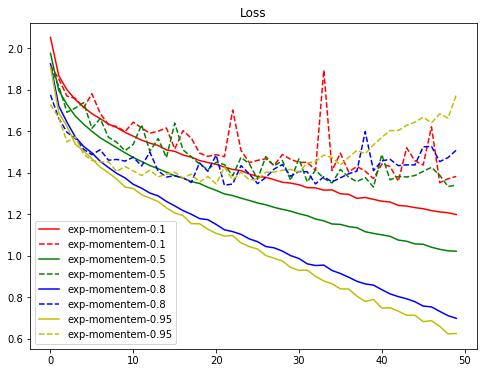

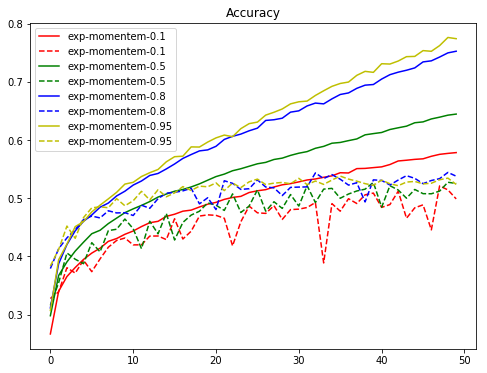

In [14]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()